<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Fish_dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"


In [2]:
import pandas as pd
fish=pd.read_csv(dataset_url,error_bad_lines=False)

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
num_species=len(fish['Species'].unique())
print('Number of unique species of fishes:',num_species)

Number of unique species of fishes: 7


In [ ]:
#Checking if there is any empty value

In [11]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

**Splitting into train and test dataset**

In [12]:
X=fish.drop(columns="Species",axis=1)

In [16]:
Y=fish["Species"]

In [17]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
#Scaling the input features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [18]:
Y.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [19]:
#Label Encoding the target variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [27]:
#Splitting into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [28]:
#Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
#Training the model
clf.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#Predicting the output
y_pred=clf.predict(X_test)

In [31]:
#Computing accuracy of model 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)

In [32]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

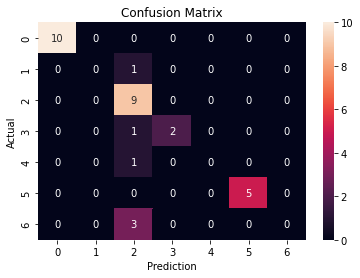

In [39]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,y_pred)
plt.figure()
sns.heatmap(cf,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')